# Credit Card Fraud

## Data Source Reference

In [11]:
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Why the data set is appropriate for classification

In [12]:
# The Credit Card Fraud Detection dataset is appropriate for classification because it contains two distinct classes of data: fraudulent and non-fraudulent transactions. This allows us to train a machine learning model to identify fraudulent transactions based on the features of the data. The dataset contains 284,807 transactions, of which 492 are fraudulent. This imbalance can be addressed using techniques such as data sampling and cost-sensitive learning. The dataset contains 28 features including the transaction amount, the time of the transaction and the location of the transaction. (Tanouz et al., 2021) States with the aid of the above I can train a machine learning model to identify fraudulent transactions.

## An explanation of what analysis is going to be performed

### What is the question that the analysis will answer?

In [13]:
# Can we accurately predict if a transaction is fraudulent or not?

###  Training and Testing the Naïve Bayes Classifier

In [14]:
# We will split our dataset into a training set and a test set where I wil use a 70/30 split. The Naïve Bayes Classifier will be trained on the training data. The model will then be used to predict the classes (fraudulent or not) of the test set transactions.

### Accuracy of Predictions

In [15]:
# 1. The accuracy of the predictions will be evaluated by comparing the predicted classes of the test set transactions with their actual classes (Witten, Frank, Hall, & Pal, 2016). This comparison will provide the overall accuracy of the model. Which will be calculated as the number of correct predictions divided by the total number of predictions.

### Plotting the Results

In [16]:
#  The results of our model's predictions will be visualized using a confusion matrix. This matrix will display the number of true positives (fraudulent transactions correctly identified), true negatives (legitimate transactions correctly identified), false positives (legitimate transactions incorrectly flagged as fraudulent) and false negatives (fraudulent transactions missed by the model) (Galarnyk, 2022).

### Effect of Changing the Training/Test Splits:

In [ ]:
# The choice of the split between training and test data can affect the model's performance (Galarnyk, 2022). A larger training set usually results in a more accurate model as it has more data to learn from. However, a small test set may not reflect the model's performance on unseen data. Cross-validation can be employed to address this, wherein the dataset is divided into 'k' folds and the model is trained and tested k times each time with a different fold as the test set

### Comparing with K-NN Algorithm

In [ ]:
# The K-NN algorithm will be trained and tested in the same manner as the Naïve Bayes Classifier. The K-NN algorithm's performance can vary based on the value of 'k' and the distance measure used (Uzila, 2022). We will compare the accuracy of both models to determine which performs better on this dataset.

## Import Libraries

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plotter
import seaborn as seab

## Load and Visualize Data

In [4]:
# Read in the dataset
data = pd.read_csv('creditcard.csv')

# Display the first few rows of the dataframe
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## Train and Test Model

In [18]:
# Split the data into features (X) and target (y)
X = data.drop('Class', axis=1)  # Assuming 'Class' is the target column
y = data['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict the classes using the Naive Bayes Classifier
y_pred_nb = nb.predict(X_test)

## Evaluate the Model Performance

In [19]:
# Calculate the accuracy of the Naive Bayes Classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print('Naive Bayes Classifier accuracy: ', accuracy_nb)

# Train the K-NN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict the classes using the K-NN Classifier
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy of the K-NN Classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('K-NN Classifier accuracy: ', accuracy_knn)

Naive Bayes Classifier accuracy:  0.9930479969102208
K-NN Classifier accuracy:  0.9985955549313578


## Visualize Residuals

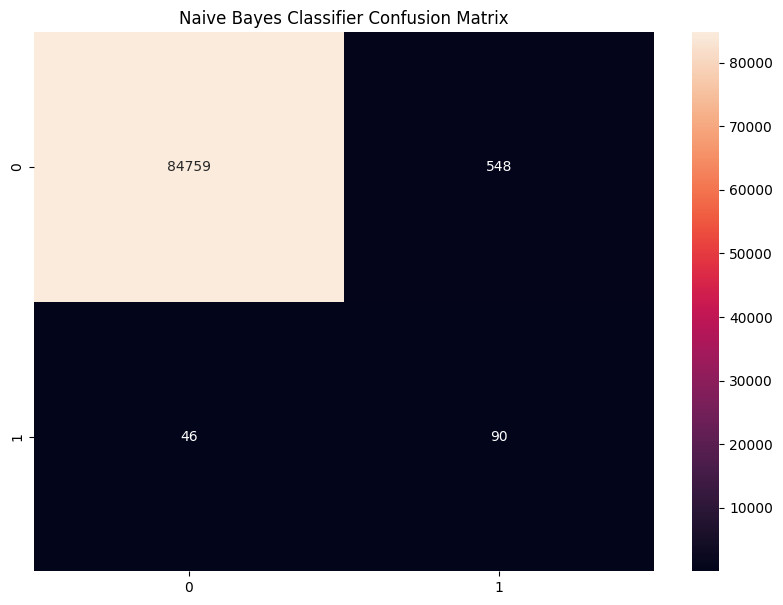

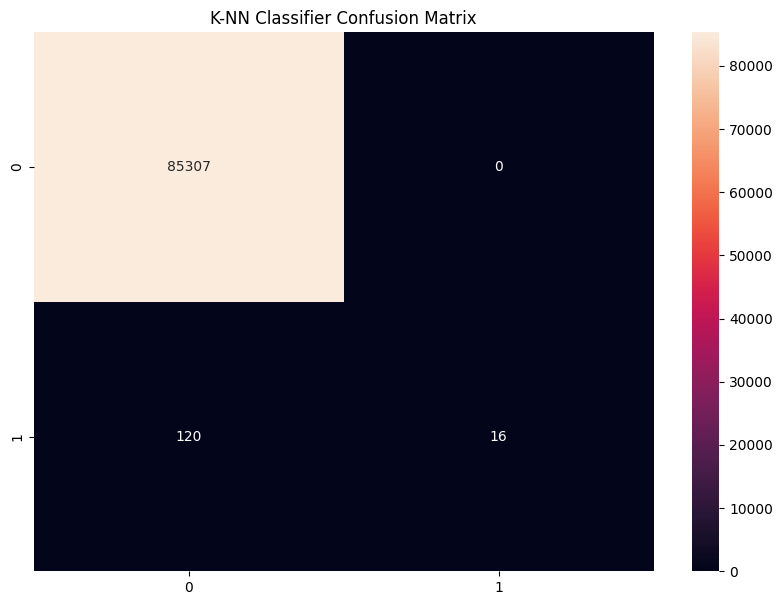

In [20]:
# Plot the confusion matrix for the Naive Bayes Classifier
plotter.figure(figsize=(10,7))
seab.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt=".0f")
plotter.title('Naive Bayes Classifier Confusion Matrix')
plotter.show()

# Plot the confusion matrix for the K-NN Classifier
plotter.figure(figsize=(10,7))
seab.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt=".0f")
plotter.title('K-NN Classifier Confusion Matrix')
plotter.show()

## References List

In [ ]:
# Tanouz, D., Subramanian, R.R., Eswar, D., Reddy, G.V.P., Kumar, A.R. and Praneeth, C.V.N.M. (2021). Credit Card Fraud Detection Using Machine Learning. [online] IEEE Xplore. doi:https://doi.org/10.1109/ICICCS51141.2021.9432308.

# Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

# Galarnyk, M. (2022). Train Test Split: What it Means and How to Use It | Built In. [online] builtin.com. Available at: https://builtin.com/data-science/train-test-split.

# www.kaggle.com. (n.d.). Credit Card Fraud Detection. [online] Available at: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud.

# www.youtube.com. (n.d.). Jupyter Notebook Overview || Data Science || Coders Arcade. [online] Available at: https://www.youtube.com/watch?v=DnpsRKz_0ik [Accessed 27 Apr. 2023].

# Uzila, A. (2022). K-Nearest Neighbors, Naive Bayes, and Decision Tree in 10 Minutes. [online] Medium. Available at: https://towardsdatascience.com/k-nearest-neighbors-naive-bayes-and-decision-tree-in-10-minutes-f8620b25e89b.